## Aula 1

In [5]:
# Importações necessárias no arquivo 00
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas de avaliação do modelo programadas no scikit
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score

# Classe de árvore e funções auxiliares
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from funcoes_ajuda import descritiva
from funcoes_ajuda import avalia_clf
from funcoes_ajuda import relatorio_missing

In [9]:
# ler o arquvio csv
titanic = pd.read_csv('/home/usp-ds-arnem/data/titanic.csv')

In [10]:
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Análise descritiva básica

In [12]:
for var in titanic.columns:
    print(f'{var}: {titanic[var].describe()}')
    print('\n')

Unnamed: 0: count    891.000000
mean     445.000000
std      257.353842
min        0.000000
25%      222.500000
50%      445.000000
75%      667.500000
max      890.000000
Name: Unnamed: 0, dtype: float64


survived: count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


pclass: count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


sex: count      891
unique       2
top       male
freq       577
Name: sex, dtype: object


age: count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


sibsp: count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000

In [13]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,891.0,NaN,NaN,NaN,445.0,257.353842,0.0,222.5,445.0,667.5,890.0
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


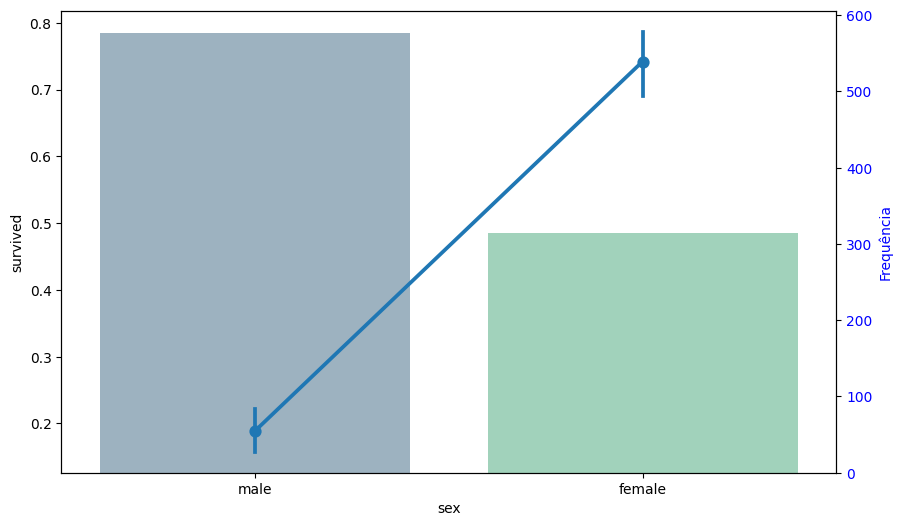

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


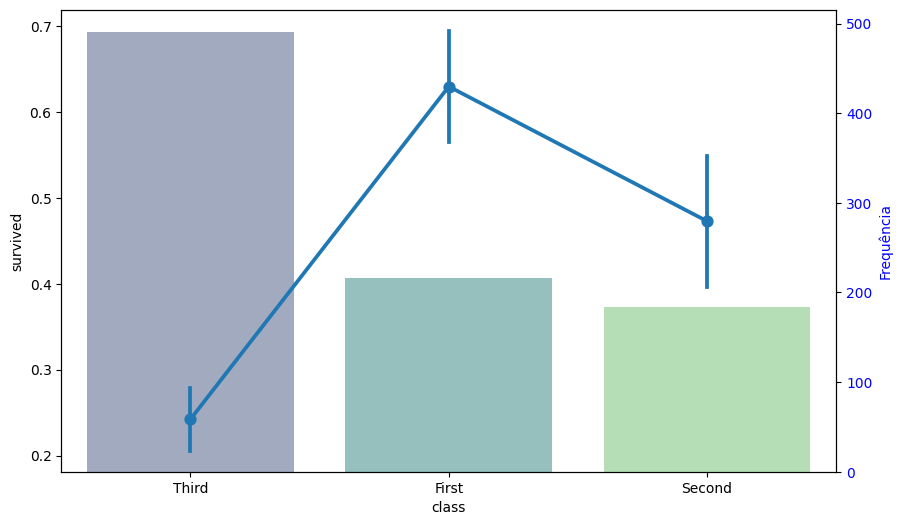

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


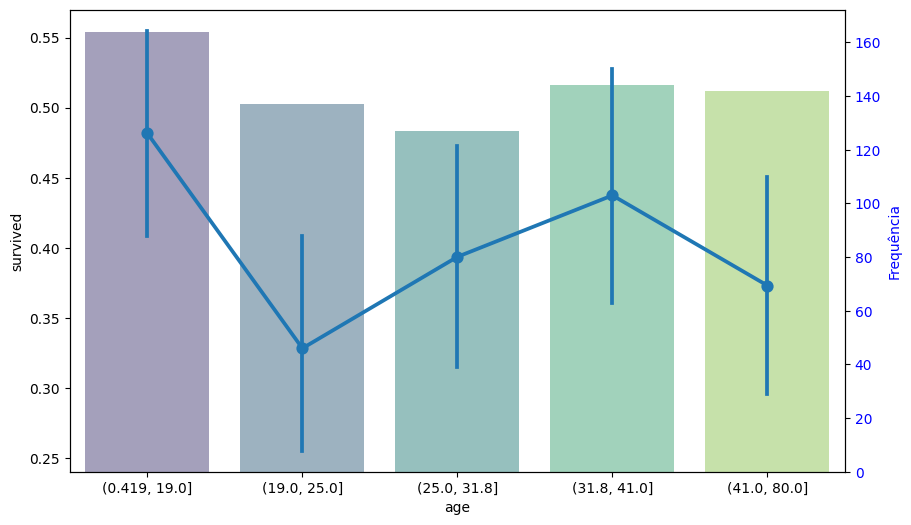

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


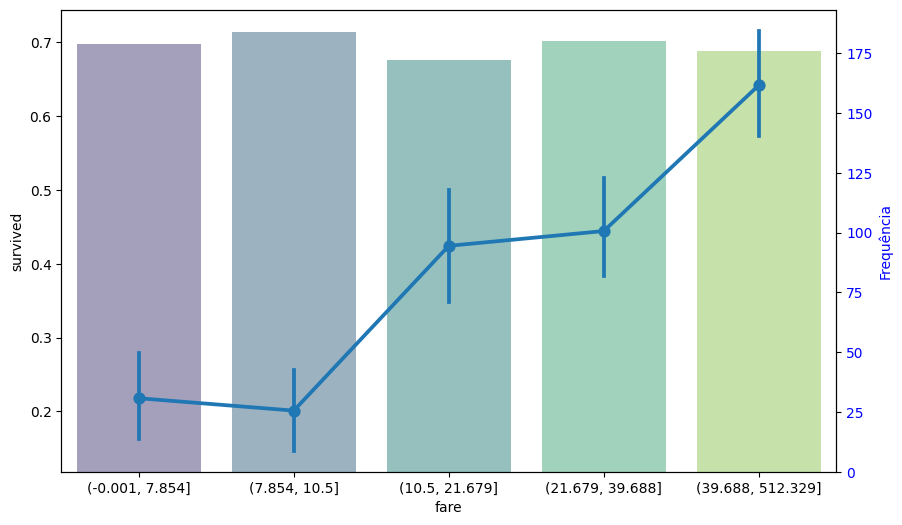

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


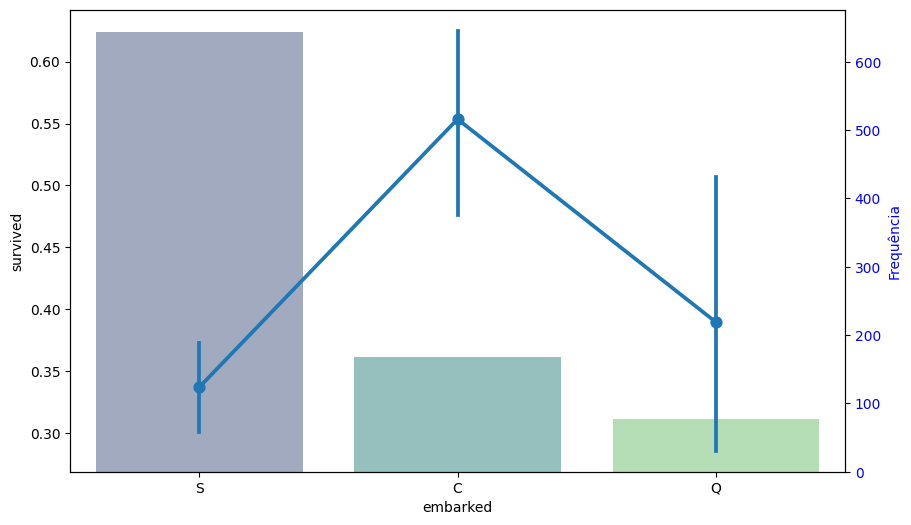

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


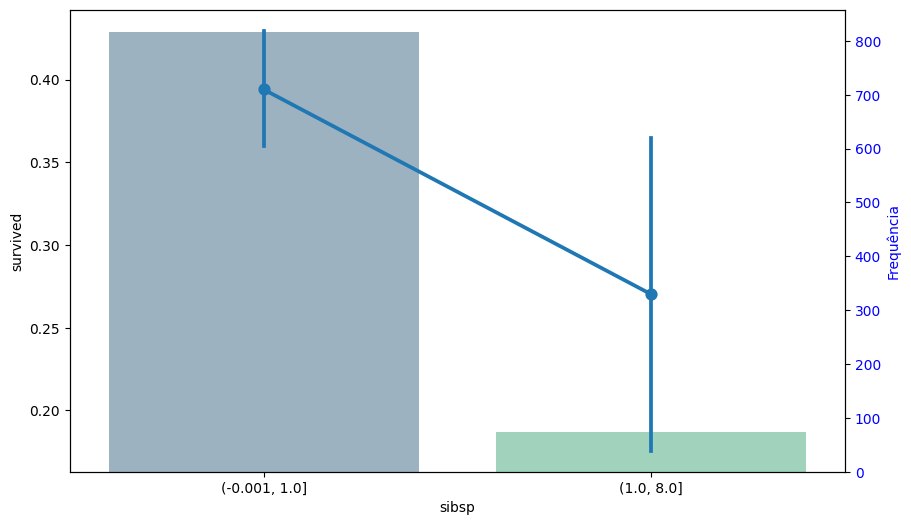

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


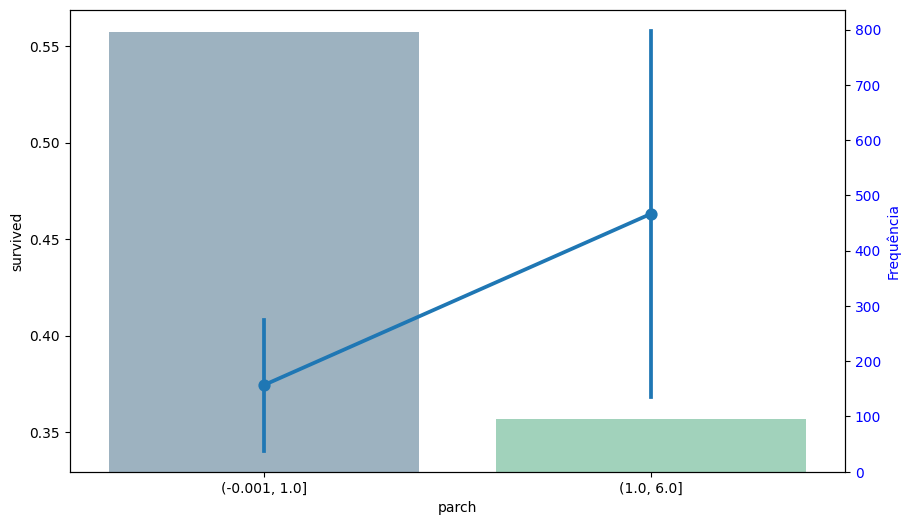

In [ ]:
# separar algumas variáveis para uma análise descritiva com as funções auxiliares
var_to_analyse = ['sex', 'class', 'age', 'fare', 'embarked', 'sibsp', 'parch']

for var in var_to_analyse:
    descritiva(titanic, var)

/tmp/ipykernel_5421/1083085897.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


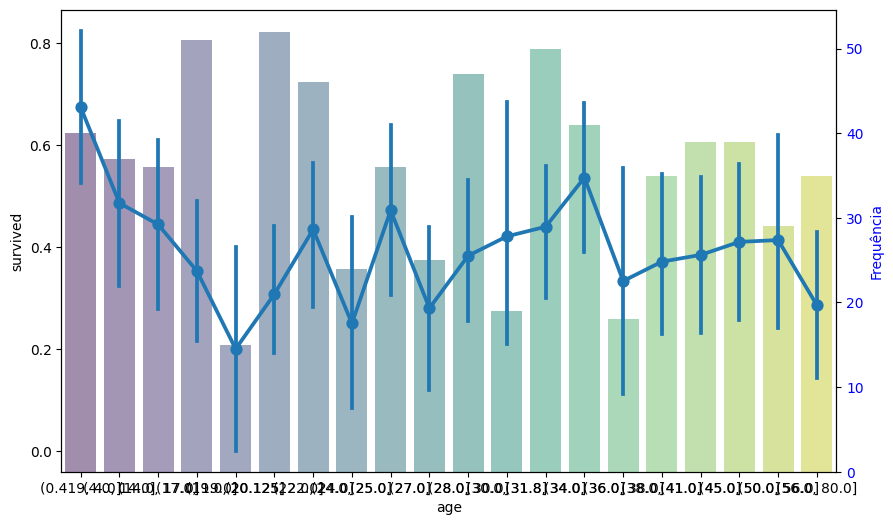

In [15]:
descritiva(titanic, 'age', max_classes=20)

Missing values

In [16]:
titanic.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic.isna().mean().apply(lambda x: f"{x:.1%}")

Unnamed: 0      0.0%
survived        0.0%
pclass          0.0%
sex             0.0%
age            19.9%
sibsp           0.0%
parch           0.0%
fare            0.0%
embarked        0.2%
class           0.0%
who             0.0%
adult_male      0.0%
deck           77.2%
embark_town     0.2%
alive           0.0%
alone           0.0%
dtype: object

In [18]:
relatorio_missing(titanic)

Número de linhas: 891 | Número de colunas: 16


,Pct_missing,Freq_missing
Unnamed: 0,0.0%,0
survived,0.0%,0
pclass,0.0%,0
sex,0.0%,0
age,19.9%,177
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
embarked,0.2%,2
class,0.0%,0


Tratar a variável 'age', já que o scikit-learn não roda com missings.

In [19]:
# substituir os valores missing da variável 'age' pela média
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

In [20]:
# drop de colunas que não serão utilizadas
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 
                      'alive', 'alone'], inplace=True)

In [21]:
metadados = titanic.dtypes

In [22]:
metadados

Unnamed: 0      int64
survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
dtype: object

In [23]:
print('\nVariáveis string')
print(metadados[metadados == 'object'])


Variáveis string
sex         object
embarked    object
dtype: object


Transformar 'object' em dummies

In [ ]:
titanic_dummies = pd.get_dummies(titanic, drop_first=True) # drop_first tira uma das categorias
titanic_dummies.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False
2,2,1,3,26.0,0,0,7.9250,False,False,True
3,3,1,1,35.0,1,0,53.1000,False,False,True
4,4,0,3,35.0,0,0,8.0500,True,False,True


Porque, no dummies optamos por remover uma das categorias com drop_first?

No caso de 'sex', por exemplo, teríamos 2 variáveis:
- sex_male
- sex_female

E não precisamos disso, já que ou a pessoa é 'male' ou não é male, então os valores `0` e `1` conseguem transmitir esta informação dentro da mesma variável.

In [25]:
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   survived    891 non-null    int64  
 2   pclass      891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   sex_male    891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


Salvando a base tratada

In [26]:
# O pkl é um formato do Python, que vai manter todas as propriedades do objeto
titanic_dummies.to_pickle('/home/usp-ds-arnem/data/titanic.pkl')

In [27]:
# Parquet é um formato popular, eficiente, compatível com outras plataformas
titanic_dummies.to_parquet('/home/usp-ds-arnem/data/titanic.parquet')

Primeira árvore 🎄

In [28]:
# Separando variável explicativa da variável resposta
X = titanic_dummies.drop(columns='survived')
y = titanic_dummies['survived']

In [29]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=3, random_state=42)

In [30]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Plotar a árvore

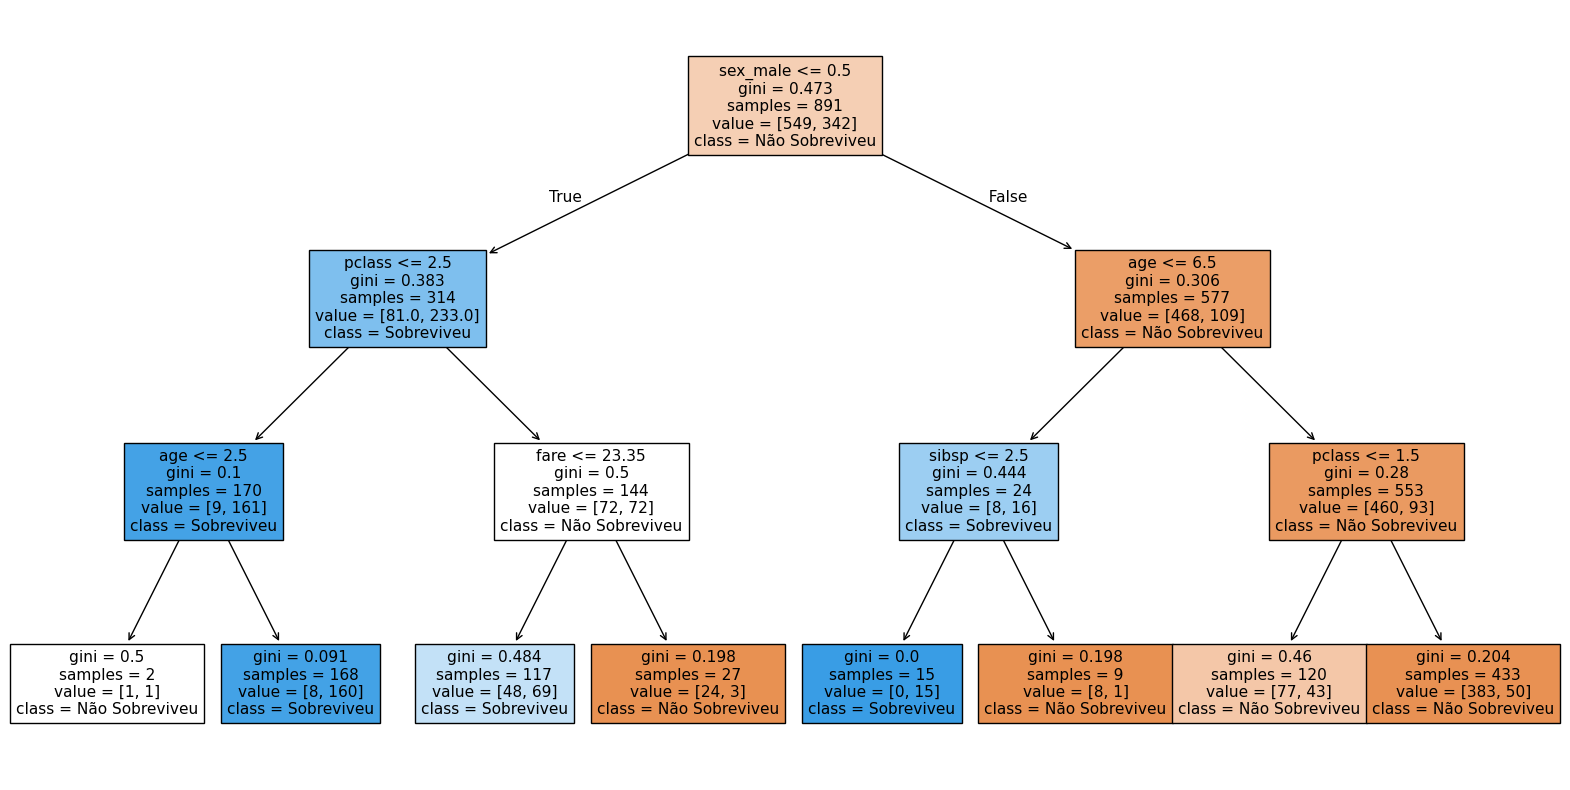

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, 
          class_names=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

Suponha que temos novos dados para classificar

In [33]:
novos_dados = X.tail()
print(novos_dados)

     Unnamed: 0  pclass        age  sibsp  parch   fare  sex_male  embarked_Q  \
886         886       2  27.000000      0      0  13.00      True       False   
887         887       1  19.000000      0      0  30.00     False       False   
888         888       3  29.699118      1      2  23.45     False       False   
889         889       1  26.000000      0      0  30.00      True       False   
890         890       3  32.000000      0      0   7.75      True        True   

     embarked_S  
886        True  
887        True  
888        True  
889       False  
890       False  


In [34]:
dt_novos_dados = dt.predict(novos_dados)
dt_novos_dados

array([0, 1, 0, 0, 0])

In [35]:
dt_train = dt.predict(X)

In [36]:
# Comparar com os valores reais por uma tabela cruzada
print(pd.crosstab(dt_train, y, margins=True))
print(pd.crosstab(dt_train, y, normalize='index'))
print(pd.crosstab(dt_train, y, normalize='columns'))

survived    0    1  All
row_0                  
0         493   98  591
1          56  244  300
All       549  342  891
survived         0         1
row_0                       
0         0.834179  0.165821
1         0.186667  0.813333
survived         0        1
row_0                      
0         0.897996  0.28655
1         0.102004  0.71345


In [37]:
acertos = dt_train == y
pct_acertos = acertos.sum() / len(acertos)
print(f'A acurácia da árvore é: {pct_acertos:.2%}')

A acurácia da árvore é: 82.72%


Calculando acurácia e matriz de confusão

In [38]:
cm = confusion_matrix(y, dt.predict(X))
ac = accuracy_score(y, dt.predict(X))
bac = balanced_accuracy_score(y, dt.predict(X))

print(f'A acurácia da árvore é: {ac:.1%}')
print(f'A acurácia balanceada da árvore é: {bac:.1%}')

A acurácia da árvore é: 82.7%
A acurácia balanceada da árvore é: 80.6%


### Accuracy (Acurácia)
1. É a proporção de predições corretas sobre o total de predições
2. Calculada como: (VP + VN) / (VP + VN + FP + FN)
3. Limitação: Pode ser enganosa com dados desbalanceados

### Balanced Accuracy (Acurácia Balanceada)
1. É a média da acurácia obtida em cada classe
2. Calculada como: (Sensitividade + Especificidade) / 2
3. Vantagem: Melhor para datasets desbalanceados




A acurácia balanceada é especialmente útil quando:
- Classes estão desbalanceadas
- Falsos positivos e falsos negativos têm custos diferentes
- Precisamos avaliar igualmente o desempenho em todas as classes

In [39]:
cm

array([[493,  56],
       [ 98, 244]])

Visualização gráfica

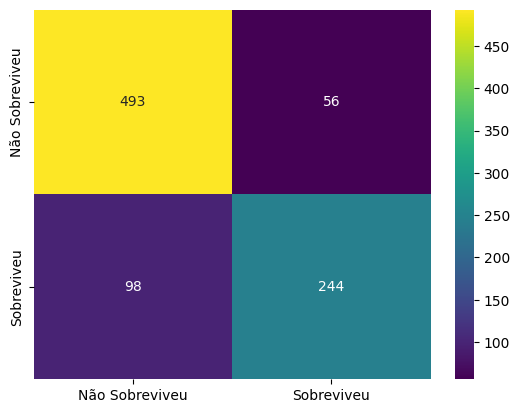

In [40]:
sns.heatmap(cm, annot=True, fmt='d', 
            cmap='viridis',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

Visualização da árvore como texto

In [41]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=list(X.columns),
                  show_weights=True,
                  spacing=3))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 2.50
|   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |--- age >  2.50
|   |   |   |--- weights: [8.00, 160.00] class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- weights: [48.00, 69.00] class: 1
|   |   |--- fare >  23.35
|   |   |   |--- weights: [24.00, 3.00] class: 0
|--- sex_male >  0.50
|   |--- age <= 6.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- weights: [0.00, 15.00] class: 1
|   |   |--- sibsp >  2.50
|   |   |   |--- weights: [8.00, 1.00] class: 0
|   |--- age >  6.50
|   |   |--- pclass <= 1.50
|   |   |   |--- weights: [77.00, 43.00] class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- weights: [383.00, 50.00] class: 0



In [42]:
print(classification_report(y, dt.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891



### Índices utilizados para impureza

Tanto o índice Gini quanto a Entropia são medidas de impureza (ou heterogeneidade) usadas para decidir as melhores divisões em uma árvore de decisão. Vamos entender cada uma:

**Gini**

- Varia de 0 (puro) a 0.5 (máxima impureza)
- Computacionalmente mais eficiente
- Tende a isolar a classe mais frequente

**Entropia**

- Varia de 0 (puro) a 1 (máxima impureza)
- Mais sensível a mudanças nas probabilidades
- Penaliza mais as divisões não balanceadas

Principais diferenças práticas:

- A Entropia é mais sensível a diferenças nas probabilidades das classes
- O índice Gini é computacionalmente mais eficiente por não envolver logaritmos
- Na maioria dos casos práticos, ambas as medidas produzem resultados muito similares

A escolha entre Gini e Entropia geralmente não causa grande impacto no desempenho final do modelo. O Gini é o padrão no algoritmo CART (implementação do scikit-learn), enquanto a Entropia é mais comum em algoritmos ID3 e C4.5.

### Cross validation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from funcoes_ajuda import avalia_clf

In [44]:
titanic = pd.read_pickle('/home/usp-ds-arnem/data/titanic.pkl')
titanic.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False
2,2,1,3,26.0,0,0,7.9250,False,False,True
3,3,1,1,35.0,1,0,53.1000,False,False,True
4,4,0,3,35.0,0,0,8.0500,True,False,True


In [48]:
# Separar em features e target
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 83.2%
A acurácia balanceada da árvore é: 81.0%
AUC-ROC: 86.77%
GINI: 73.55%

               precision    recall  f1-score   support

           0       0.84      0.90      0.87       415
           1       0.82      0.72      0.76       253

    accuracy                           0.83       668
   macro avg       0.83      0.81      0.82       668
weighted avg       0.83      0.83      0.83       668



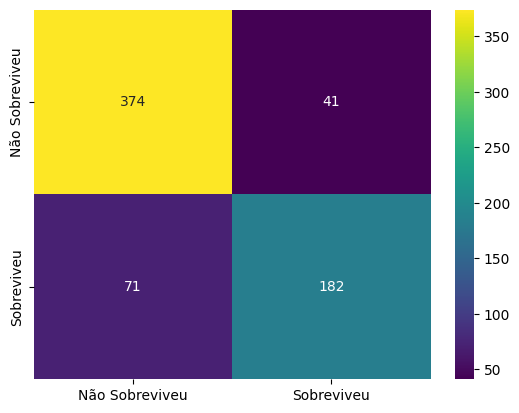

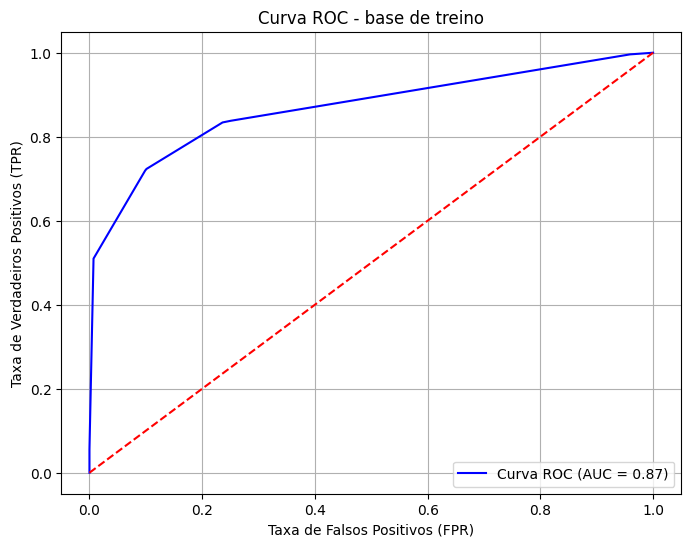

In [ ]:
# Modelo de árvore
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, y_train)
# Avaliar o modelo na base de treino
print('Avaliando a base de treino:')
avalia_clf(dt, y_train, X_train)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 80.3%
A acurácia balanceada da árvore é: 78.5%
AUC-ROC: 84.12%
GINI: 68.24%

               precision    recall  f1-score   support

           0       0.81      0.87      0.84       134
           1       0.78      0.70      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



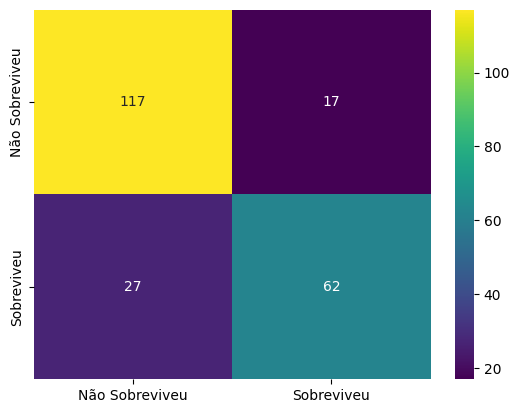

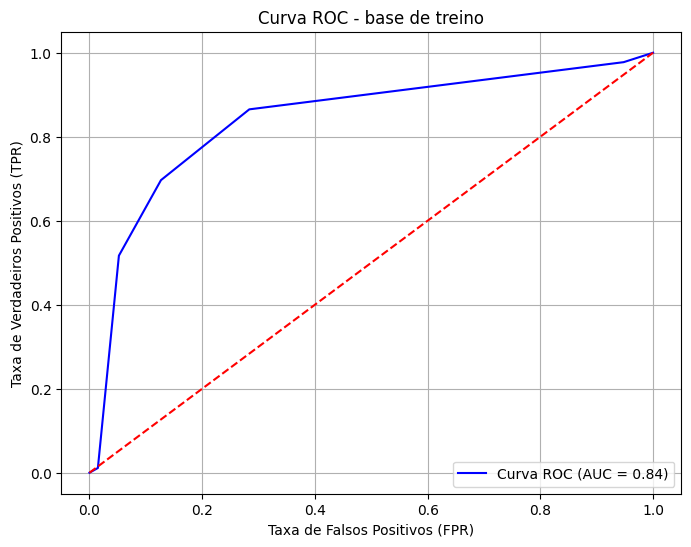

In [54]:
# Avaliar o modelo na base de teste
print('Avaliando a base de treino:')
avalia_clf(dt, y_test, X_test)

Avaliando a base de treino:

Base de Treino:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00       253

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



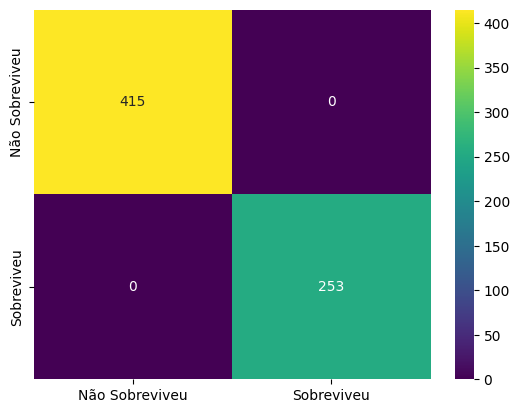

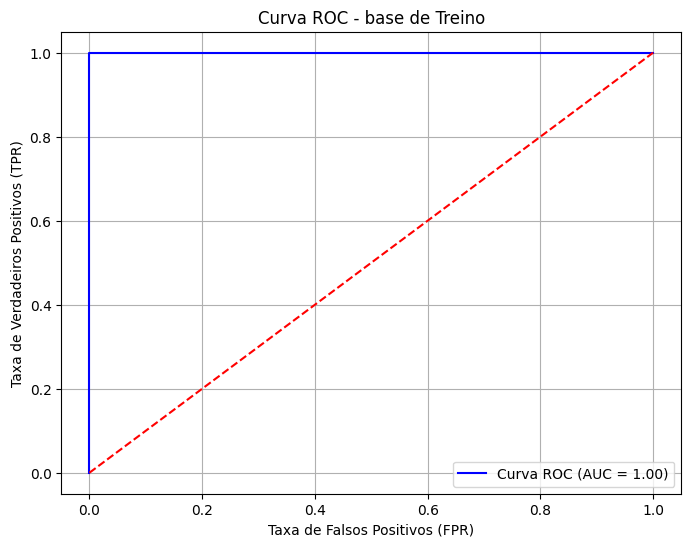

Avaliando a base de teste:

Base de Teste:
A acurácia da árvore é: 76.2%
A acurácia balanceada da árvore é: 74.8%
AUC-ROC: 74.75%
GINI: 49.51%

               precision    recall  f1-score   support

           0       0.79      0.82      0.81       134
           1       0.71      0.67      0.69        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



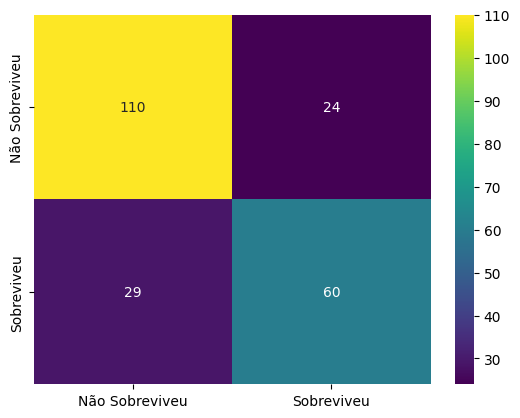

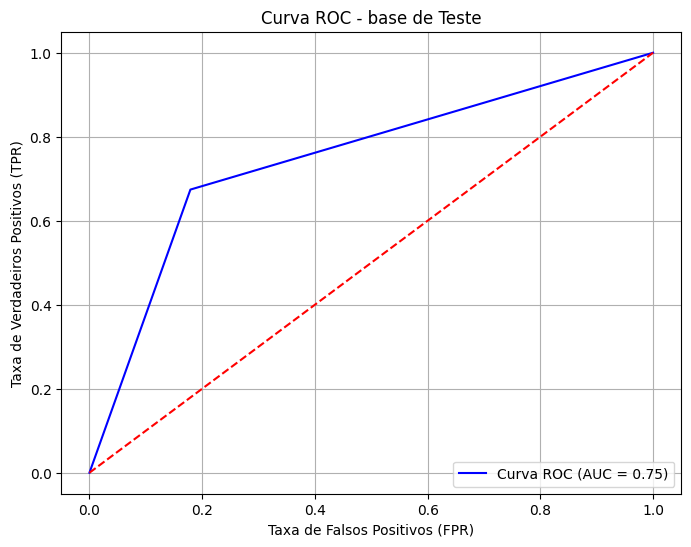

In [55]:
dt = DecisionTreeClassifier(criterion='gini', 
                            max_depth=30, 
                            random_state=42,
                            ccp_alpha=0)

dt.fit(X_train, y_train)

print('Avaliando a base de treino:')
avalia_clf(dt, y_train, X_train, base='Treino')
print('Avaliando a base de teste:')
avalia_clf(dt, y_test, X_test, base='Teste')

CCP_PATH

In [60]:
ccp_path = dt.cost_complexity_pruning_path(X_train, y_train)

GINIs = []

for ccp_alpha in ccp_path.ccp_alphas:
    dt = DecisionTreeClassifier(criterion='gini', 
                                random_state=42,
                                max_depth=30,
                                ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_test)
    AUC = roc_auc_score(y_test, y_pred[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

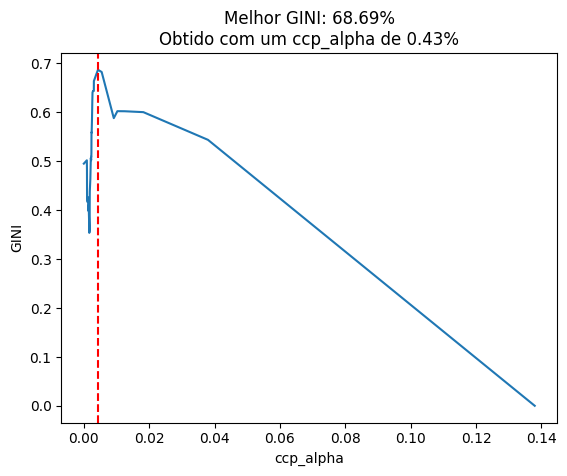

In [67]:
df_gini = pd.DataFrame({'ccp_alphas': ccp_path.ccp_alphas, 'GINI': GINIs})
GINI_max = df_gini.GINI.max()
ccp_max = df_gini.loc[df_gini.GINI == GINI_max, 'ccp_alphas'].values[0]

sns.lineplot(x=ccp_path.ccp_alphas, y=GINIs)
plt.ylabel('GINI')
plt.xlabel('ccp_alpha')
plt.axvline(ccp_max, color='red', linestyle='--')
plt.title(f'Melhor GINI: {GINI_max:.2%}\nObtido com um ccp_alpha de {ccp_max:.2%}')
plt.show()

Best Tree Ever!

Avaliando a base de treino:

Base de Treino:
A acurácia da árvore é: 84.4%
A acurácia balanceada da árvore é: 83.2%
AUC-ROC: 87.22%
GINI: 74.43%

               precision    recall  f1-score   support

           0       0.87      0.88      0.88       415
           1       0.80      0.78      0.79       253

    accuracy                           0.84       668
   macro avg       0.84      0.83      0.83       668
weighted avg       0.84      0.84      0.84       668



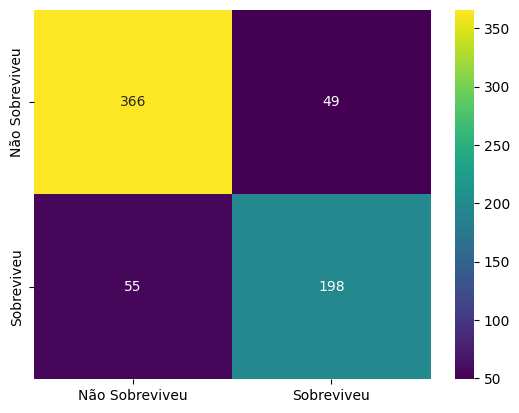

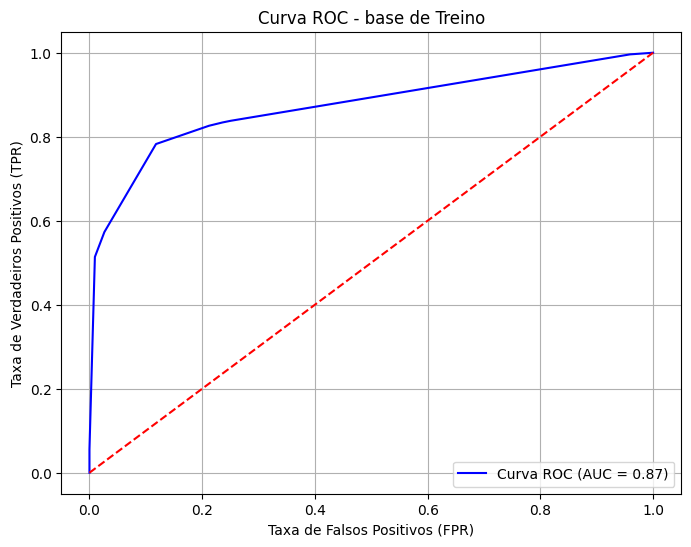

Avaliando a base de teste:

Base de Teste:
A acurácia da árvore é: 81.2%
A acurácia balanceada da árvore é: 80.0%
AUC-ROC: 84.35%
GINI: 68.69%

               precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



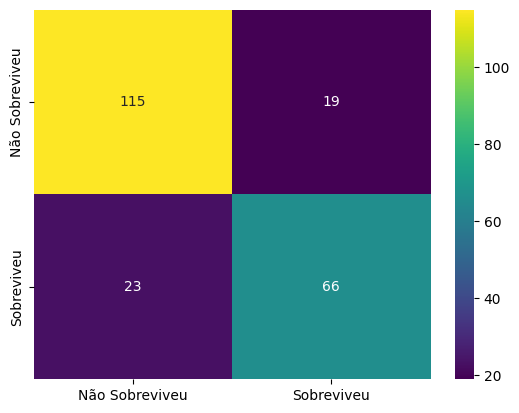

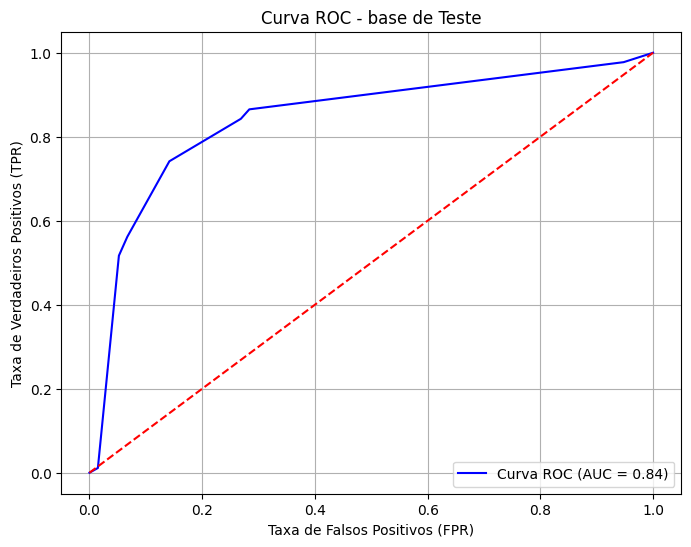

In [68]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=30,
                            random_state=42,
                            ccp_alpha=ccp_max).fit(X_train, y_train)

print('Avaliando a base de treino:')
avalia_clf(dt, y_train, X_train, base='Treino')
print('Avaliando a base de teste:')
avalia_clf(dt, y_test, X_test, base='Teste')

### Métricas de Avaliação

**Sensibilidade (Recall)**

Taxa de Verdadeiros Positivos
Mede capacidade de identificar casos positivos
Fórmula: VP / (VP + FN)

**Especificidade**

Taxa de Verdadeiros Negativos
Mede capacidade de identificar casos negativos
Fórmula: VN / (VN + FP)
AUC-ROC

**Área sob a curva ROC**
Mede capacidade discriminativa do modelo
Varia de 0 a 1 (1 = perfeito)

Interpretação
AUC = 0.5: modelo aleatório
AUC = 1.0: modelo perfeito
AUC > 0.8: geralmente considerado bom
Trade-off entre sensibilidade e especificidade

### Divisão do Dataset
**Train**

Usado para ajustar o modelo
Representa a maior parte dos dados

**Validation**

Usado para ajustar hiperparâmetros
Ajuda a evitar overfitting
Permite avaliar a performance durante o treinamento

**Test**

Usado para avaliar a performance final
Nunca visto pelo modelo durante o treinamento
Fornece uma estimativa imparcial da performance


**Benefícios**
- Generalização: Garante que o modelo funcione bem em dados não vistos
- Evitar Overfitting: Ajuste de hiperparâmetros com dados de validação
- Avaliação Imparcial: Conjunto de teste fornece uma avaliação justa